# Projeto german credit risk

In [1]:
import requests
import logging
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

In [2]:
DATA_DIR = Path.cwd().parent / 'data'

In [3]:
def load_data(data_dir: Path = DATA_DIR) -> pd.DataFrame:
    pickle_file_path = data_dir / 'data.pkl'
    if not pickle_file_path.exists():
        data_dir.mkdir(parents=True, exist_ok=True)

        url = 'https://archive.ics.uci.edu/static/public/144/statlog+german+credit+data.zip'
        response = requests.get(url)
        if response.status_code != 200:
            logging.info('Failed to download dataset.')
            return None

        file_path = data_dir / 'data.zip'
        with open(file_path, 'wb') as file:
            file.write(response.content)
        logging.info('Dataset downloaded successfully.')

        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(path=data_dir)

        columns = [
            'status',
            'duration',
            'history',
            'purpose',
            'amount',
            'savings',
            'employment',
            'installment',
            'status_sex',
            'guarantors',
            'residence',
            'property_type',
            'age',
            'plans',
            'housing',
            'credits',
            'job',
            'dependents',
            'telephone',
            'foreign',
            'target',
        ]
        
        data = pd.read_csv(
            data_dir / 'german.data',
            sep=' ', 
            header=None, 
            names=columns,
        )

        data.to_pickle(pickle_file_path)
    else:
        data = pd.read_pickle(pickle_file_path)

    return data

In [4]:
df = load_data(DATA_DIR)

## Análise exploratória

In [5]:
df.shape

(1000, 21)

In [6]:
df.head().transpose()

,0,1,2,3,4
status,A11,A12,A14,A11,A11
duration,6,48,12,42,24
history,A34,A32,A34,A32,A33
purpose,A43,A43,A46,A42,A40
amount,1169,5951,2096,7882,4870
savings,A65,A61,A61,A61,A61
employment,A75,A73,A74,A74,A73
installment,4,2,2,2,3
status_sex,A93,A92,A93,A93,A93
guarantors,A101,A101,A101,A103,A101


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status         1000 non-null   object
 1   duration       1000 non-null   int64 
 2   history        1000 non-null   object
 3   purpose        1000 non-null   object
 4   amount         1000 non-null   int64 
 5   savings        1000 non-null   object
 6   employment     1000 non-null   object
 7   installment    1000 non-null   int64 
 8   status_sex     1000 non-null   object
 9   guarantors     1000 non-null   object
 10  residence      1000 non-null   int64 
 11  property_type  1000 non-null   object
 12  age            1000 non-null   int64 
 13  plans          1000 non-null   object
 14  housing        1000 non-null   object
 15  credits        1000 non-null   int64 
 16  job            1000 non-null   object
 17  dependents     1000 non-null   int64 
 18  telephone      1000 non-null 

Separating the variable type into two lists:

- numerical
- qualitative

In [8]:
numerical_variables = [
    'duration',
    'amount',
    'installment',
    'age',
    'residence',
    'credits',
    'dependents'
]

qualitative_variables = [
    'status',
    'history',
    'purpose',
    'savings',
    'employment',
    'status_sex',
    'guarantors',
    'property_type',
    'plans',
    'housing',
    'job',
    'telephone',
    'foreign',
]

## Separating target and features from data

In [9]:
X = df.drop(columns=['target']).copy()
y = df['target'].copy()

### Numerical variables analyses

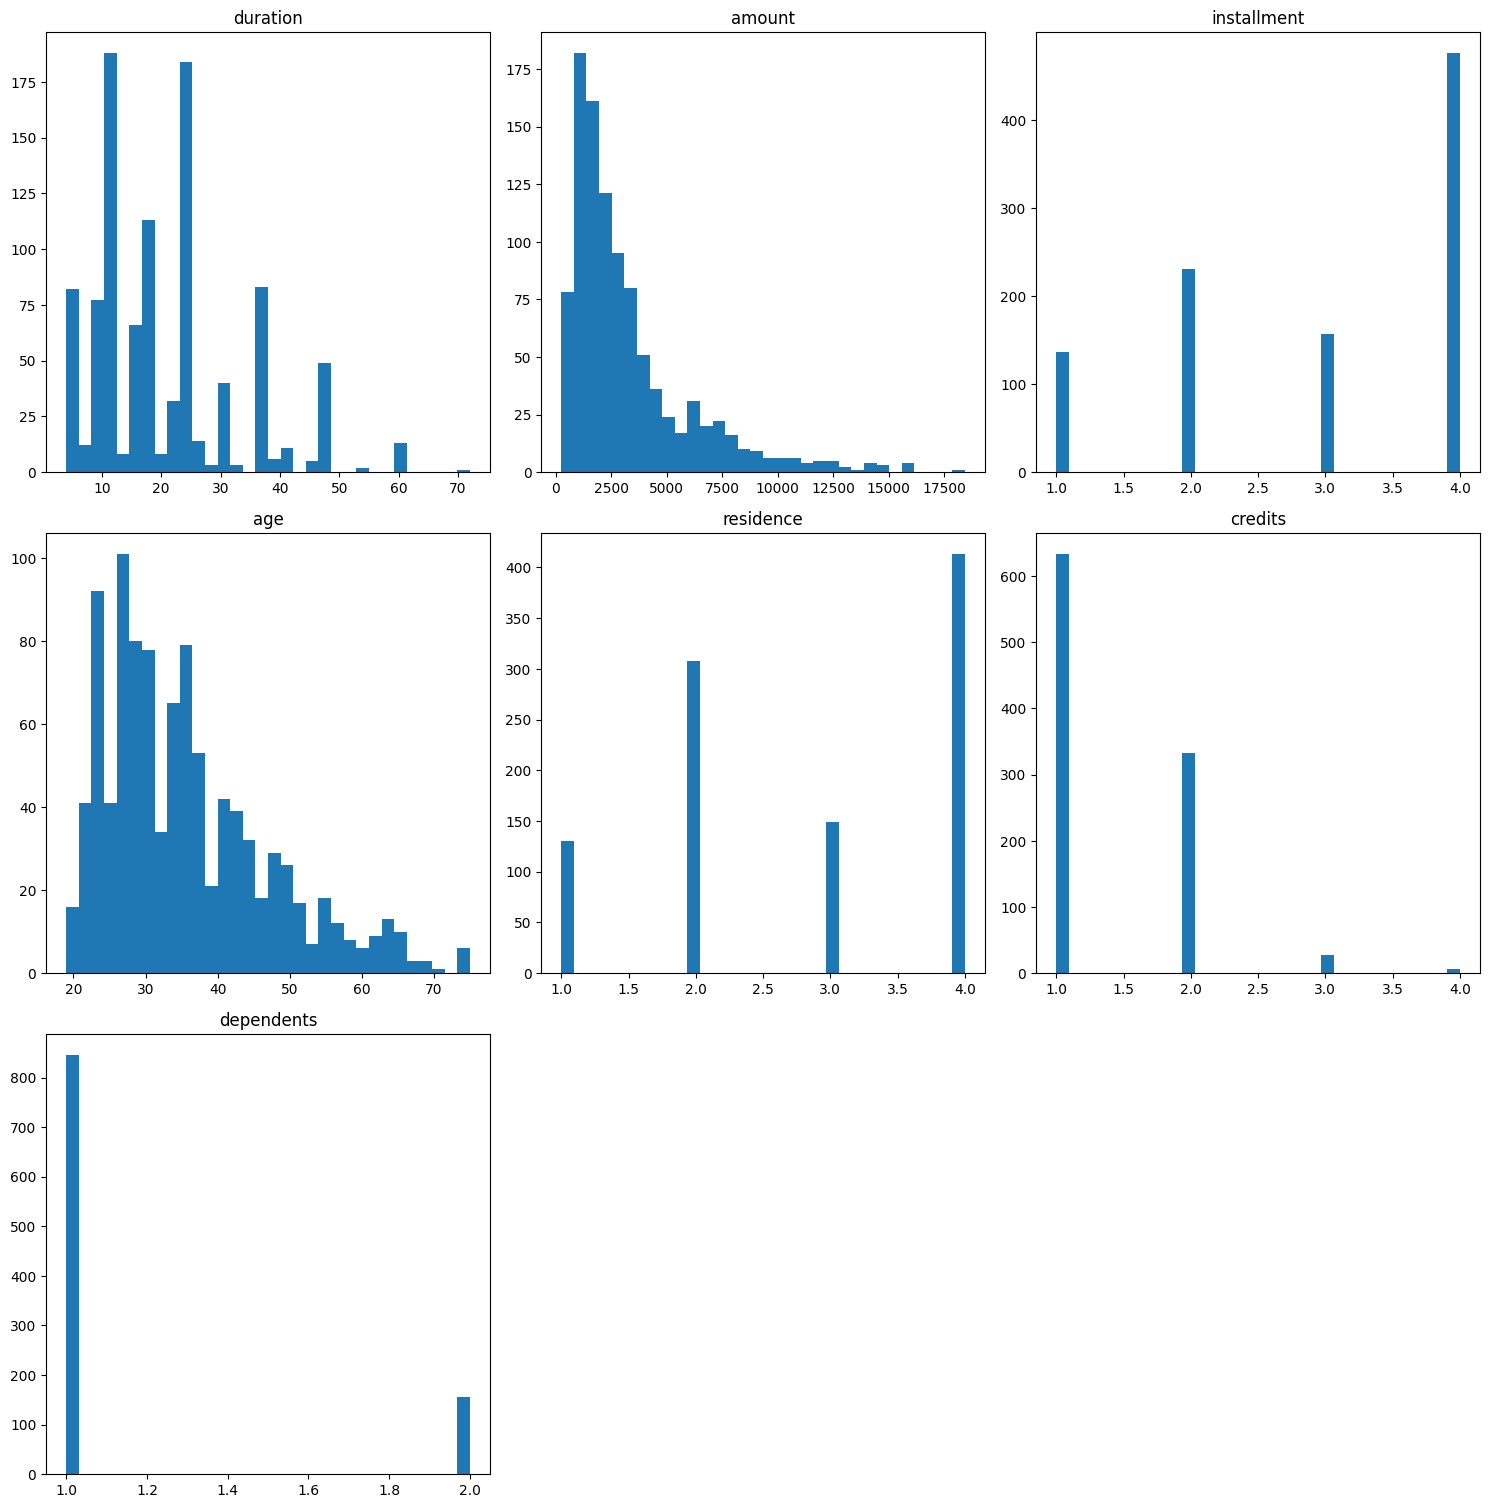

In [10]:
n_rows = (len(numerical_variables) - 1 // 3) + 1

plt.figure(figsize=(15, n_rows * 5))

for i, variable in enumerate(numerical_variables):
    plt.subplot(n_rows, 3, i + 1)
    plt.hist(X[variable], bins = np.sqrt(X.shape[0]).round(0).astype(int))
    plt.title(variable)
    
plt.tight_layout()
plt.show()

The fololowing variables looks to be categorical, insted numerical:

- installment
- residence
- credits
- dependents

Let`s check the data !

In [11]:
X['installment'].describe()

count    1000.000000
mean        2.973000
std         1.118715
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: installment, dtype: float64

In [12]:
X['installment'].value_counts()

installment
4    476
2    231
3    157
1    136
Name: count, dtype: int64

installmente really are categorial !

In [13]:
X['residence'].describe()

count    1000.000000
mean        2.845000
std         1.103718
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: residence, dtype: float64

In [14]:
X['residence'].value_counts()

residence
4    413
2    308
3    149
1    130
Name: count, dtype: int64

residence really are categorial

In [15]:
X['credits'].describe()

count    1000.000000
mean        1.407000
std         0.577654
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: credits, dtype: float64

In [16]:
X['credits'].value_counts()

credits
1    633
2    333
3     28
4      6
Name: count, dtype: int64

credits really are categorical

In [17]:
X['dependents'].describe()

count    1000.000000
mean        1.155000
std         0.362086
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: dependents, dtype: float64

In [18]:
X['dependents'].value_counts()

dependents
1    845
2    155
Name: count, dtype: int64

dependents really are categorical !

#### Changing the varaibles types for the correct type

In [19]:
for var in ['installment', 'residence', 'credits', 'dependents']:
    numerical_variables.remove(var)
    qualitative_variables.append(var)
    X[var] = X[var].astype('category')

In [20]:
numerical_variables

['duration', 'amount', 'age']

In [21]:
qualitative_variables

['status',
 'history',
 'purpose',
 'savings',
 'employment',
 'status_sex',
 'guarantors',
 'property_type',
 'plans',
 'housing',
 'job',
 'telephone',
 'foreign',
 'installment',
 'residence',
 'credits',
 'dependents']

#### Another look at the histograms

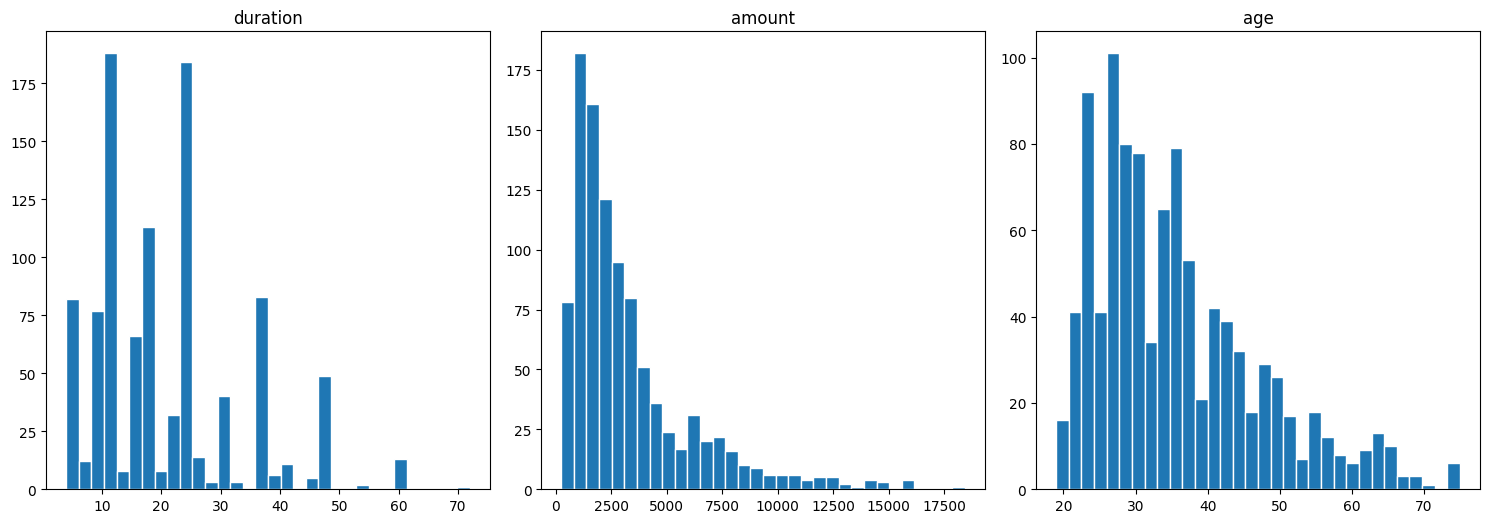

In [22]:
n_rows = (len(numerical_variables) - 1 // 3) + 1

plt.figure(figsize=(15, n_rows * 5))

for i, variable in enumerate(numerical_variables):
    plt.subplot(n_rows, 3, i + 1)
    plt.hist(X[variable], bins = np.sqrt(X.shape[0]).round(0).astype(int), edgecolor='white')
    plt.title(variable)
    
plt.tight_layout()
plt.show()

The features `amount` and `age` are good options to use their log on model

In [23]:
X['amount_log'] = np.log10(X['amount'])
X['age_log'] = np.log10(X['age'])

In [24]:
X['amount_log'].describe()

count    1000.000000
mean        3.382586
std         0.337218
min         2.397940
25%         3.135292
50%         3.365394
75%         3.599037
max         4.265384
Name: amount_log, dtype: float64

In [25]:
X['age_log'].describe()

count    1000.000000
mean        1.530586
std         0.130179
min         1.278754
25%         1.431364
50%         1.518514
75%         1.623249
max         1.875061
Name: age_log, dtype: float64

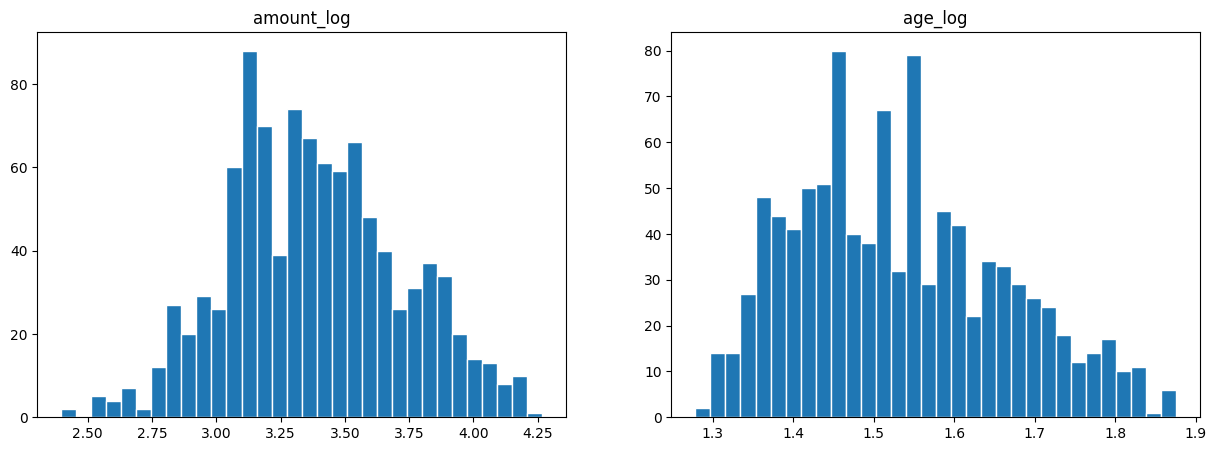

In [26]:
plt.figure(figsize=(15, 5))

for i, var in enumerate(['amount_log', 'age_log']):
    plt.subplot(1, 2, i + 1)
    plt.hist(X[var], bins = np.sqrt(X.shape[0]).round(0).astype(int), edgecolor='white')
    plt.title(var)

In [27]:
numerical_variables.append('amount_log')
numerical_variables.append('age_log')

#### Box plot from numerical variables

In [28]:
import seaborn as sns

/home/arthur/Documentos/Insper/6_semestre/projetos_ml/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arthur/Documentos/Insper/6_semestre/projetos_ml/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arthur/Documentos/Insper/6_semestre/projetos_ml/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arthur/Documentos/Insper/6_semestre/projetos_ml/venv/lib/python3.10/site-packages/seaborn/_

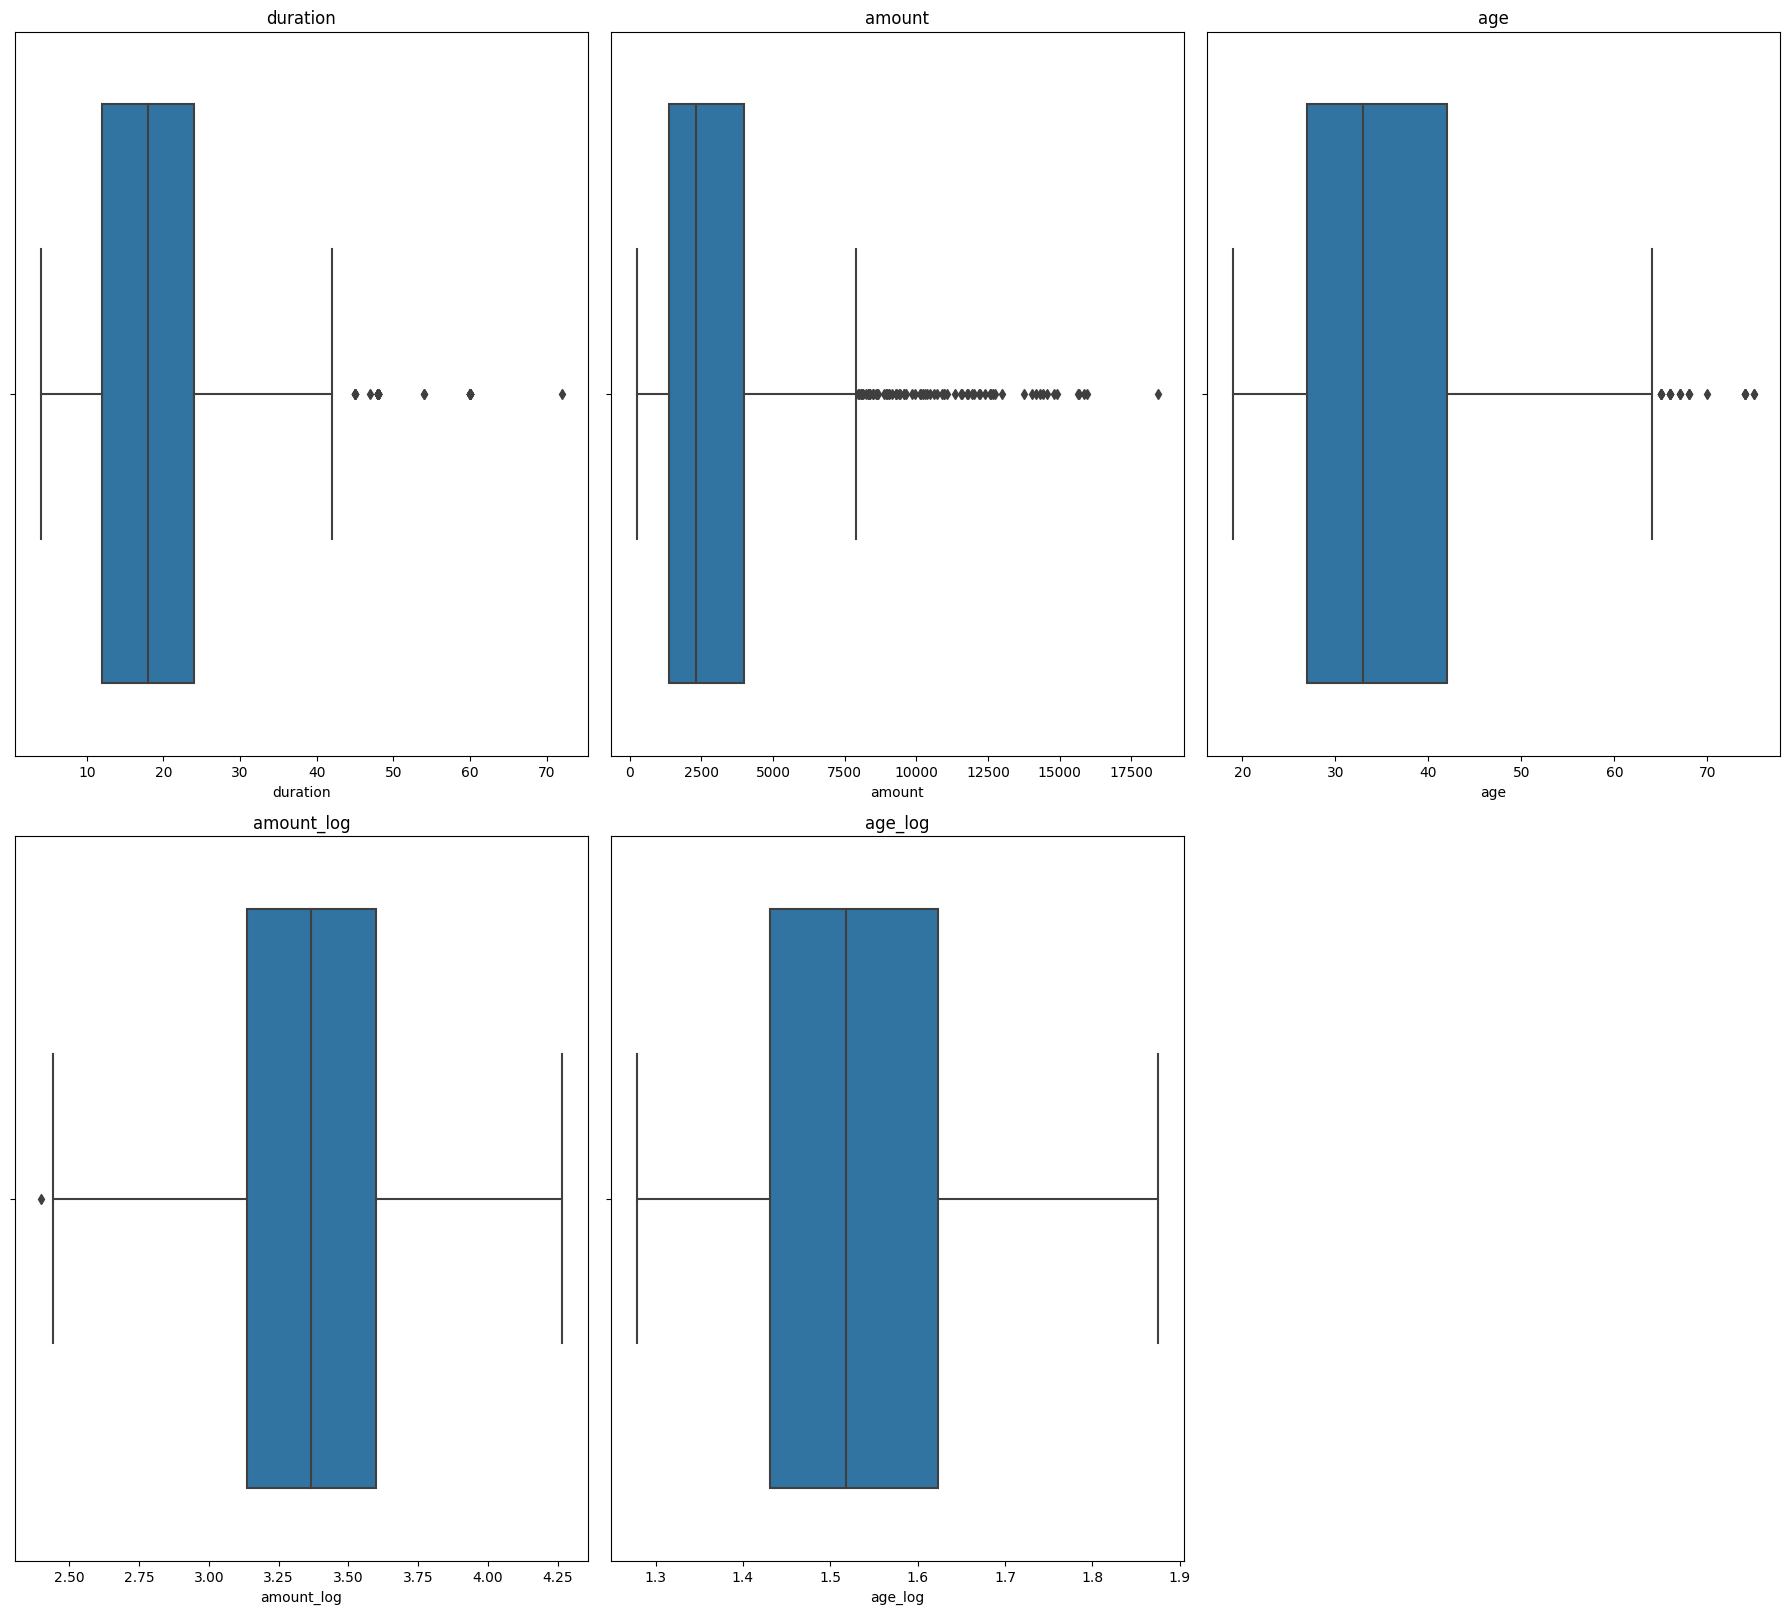

In [29]:
n_rows = (len(numerical_variables) - 1 // 3) + 1

plt.figure(figsize=(18, n_rows * 8))

for i, variable in enumerate(numerical_variables):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(x= variable, data= X)
    plt.title(variable)

plt.tight_layout()

The logged features has fewer outliners, indicating tha are better features to be worked with.

### Categorical variables analyses

A first look at the categorical variables

In [30]:
def plot_categoricals(data, cols, sorted = True):
    summary = data[cols].describe().transpose().sort_values(by='count')
    print(summary)
    
    for i, (col, val) in enumerate(summary['count'].items()):
        plt.figure(figsize=(15, 5))
        ser = data[col].value_counts()
        if sorted:
            ser = ser.sort_index()
        else:
            ser = ser.sort_values()
        ax = ser.plot(kind='barh')
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'{col}, n=({int(val)})')
        plt.show()
        
    plt.tight_layout()      

              count unique   top freq
status         1000      4   A14  394
residence      1000      4     4  413
installment    1000      4     4  476
foreign        1000      2  A201  963
telephone      1000      2  A191  596
job            1000      4  A173  630
housing        1000      3  A152  713
credits        1000      4     1  633
plans          1000      3  A143  814
guarantors     1000      3  A101  907
status_sex     1000      4   A93  548
employment     1000      5   A73  339
savings        1000      5   A61  603
purpose        1000     10   A43  280
history        1000      5   A32  530
property_type  1000      4  A123  332
dependents     1000      2     1  845


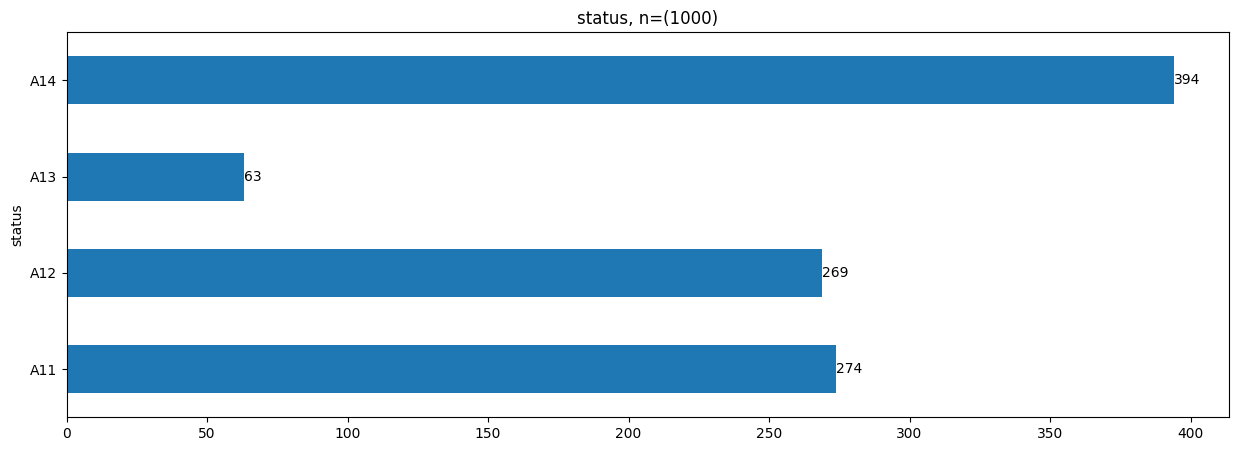

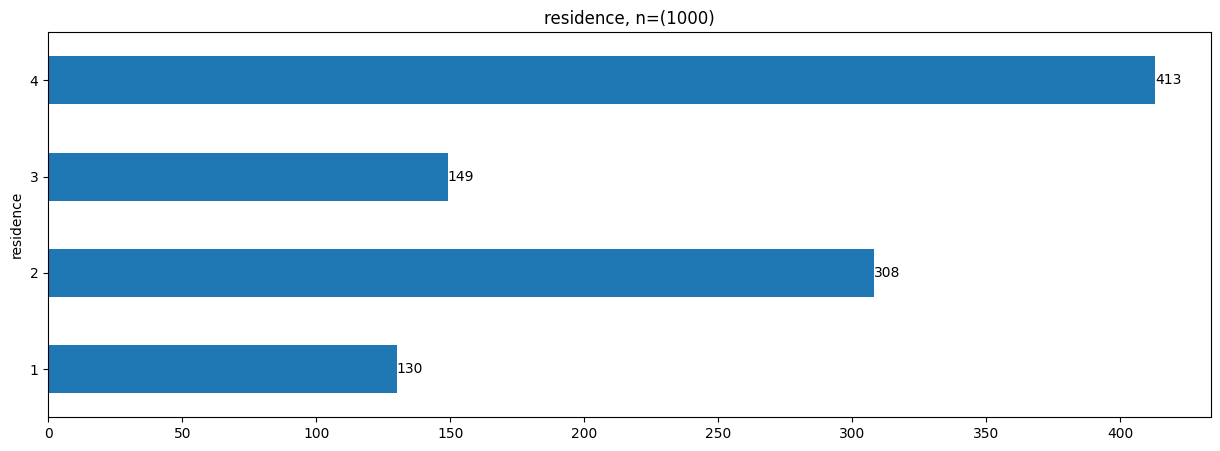

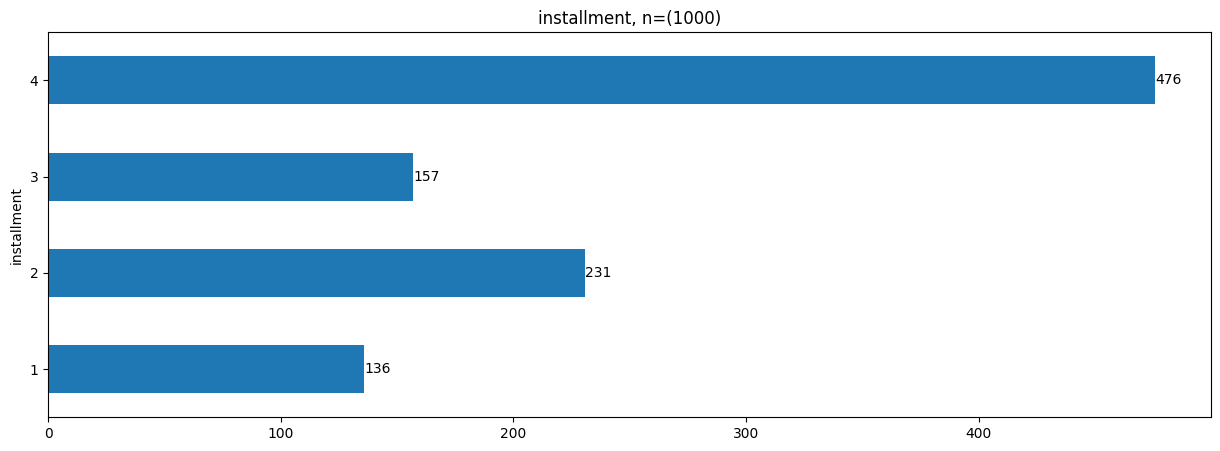

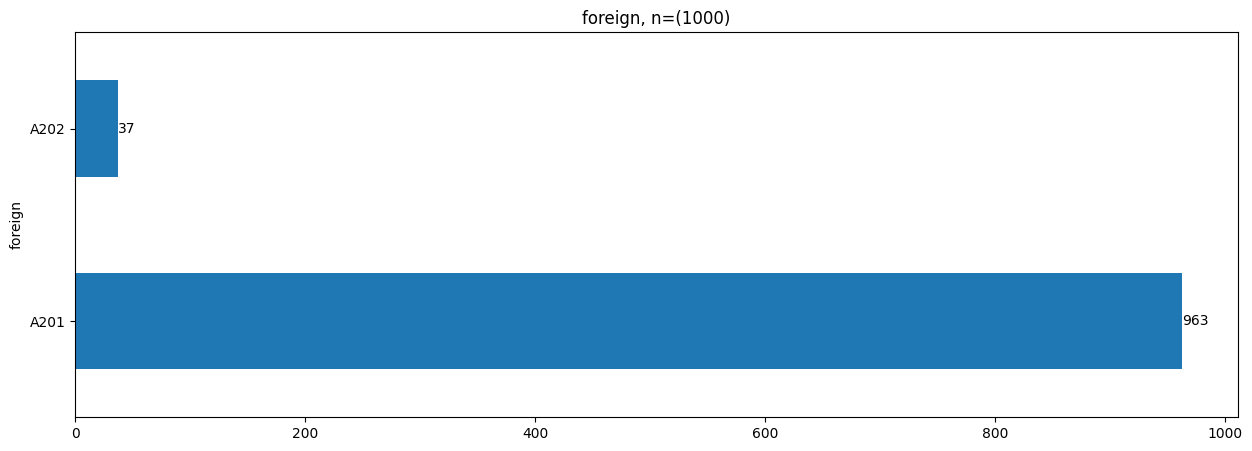

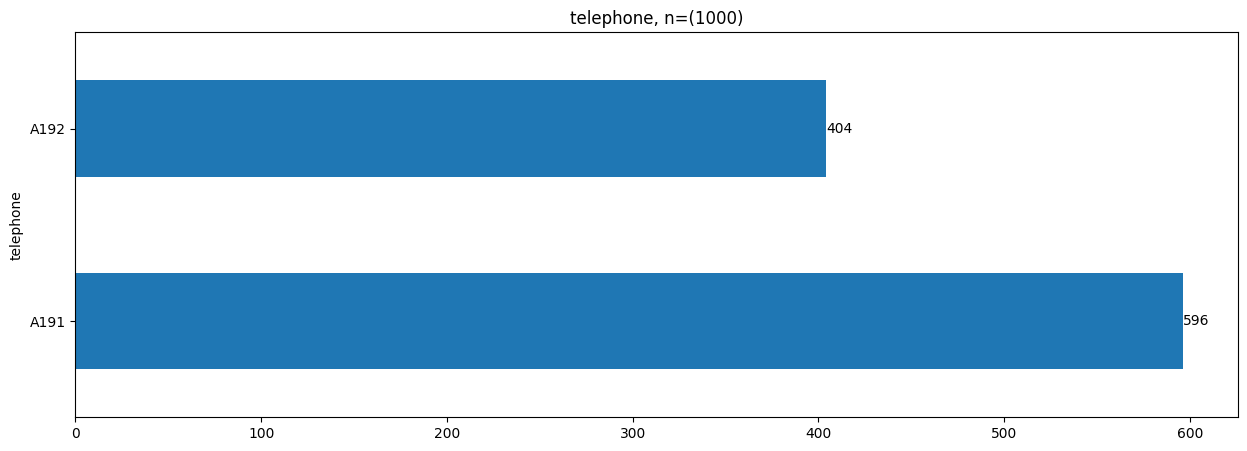

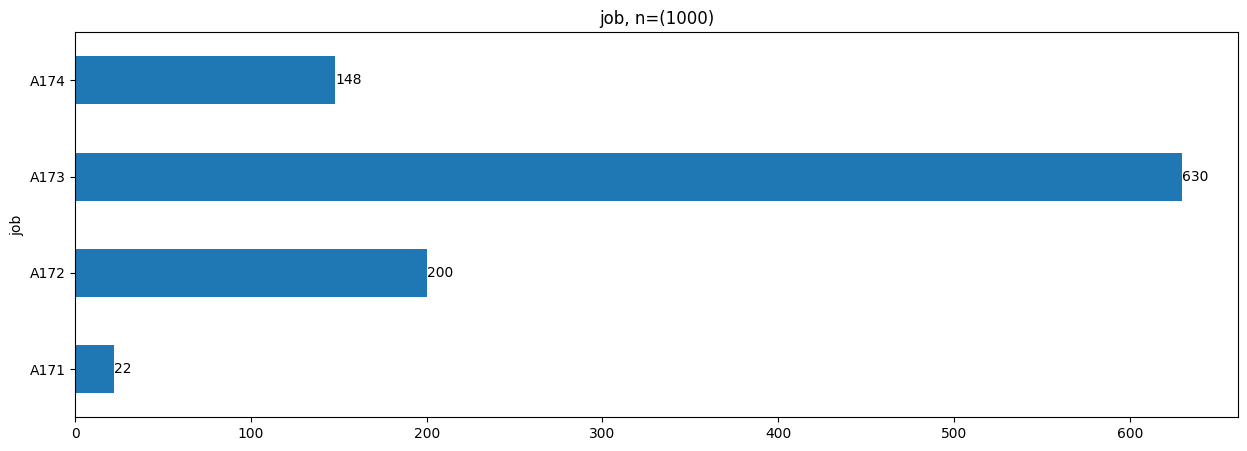

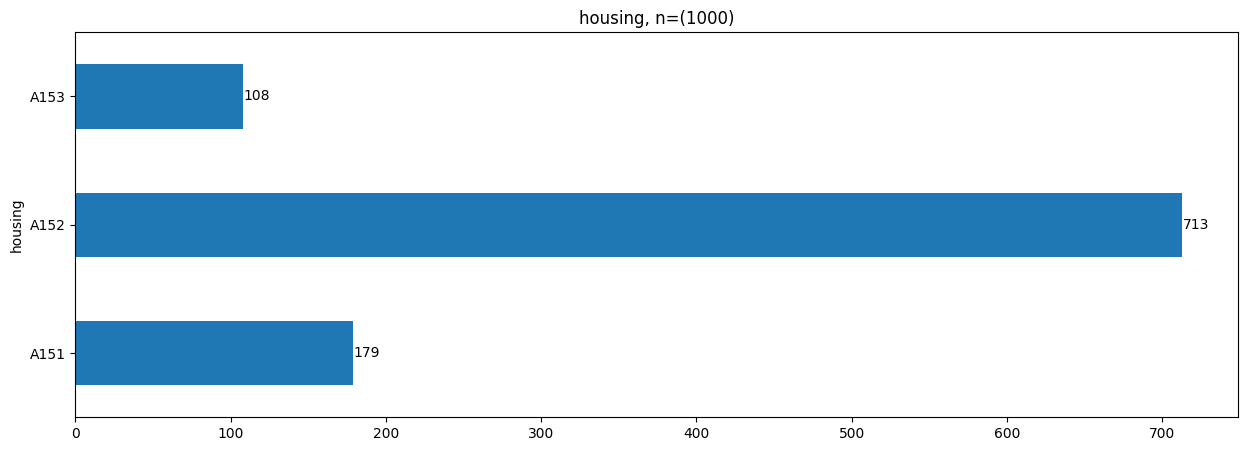

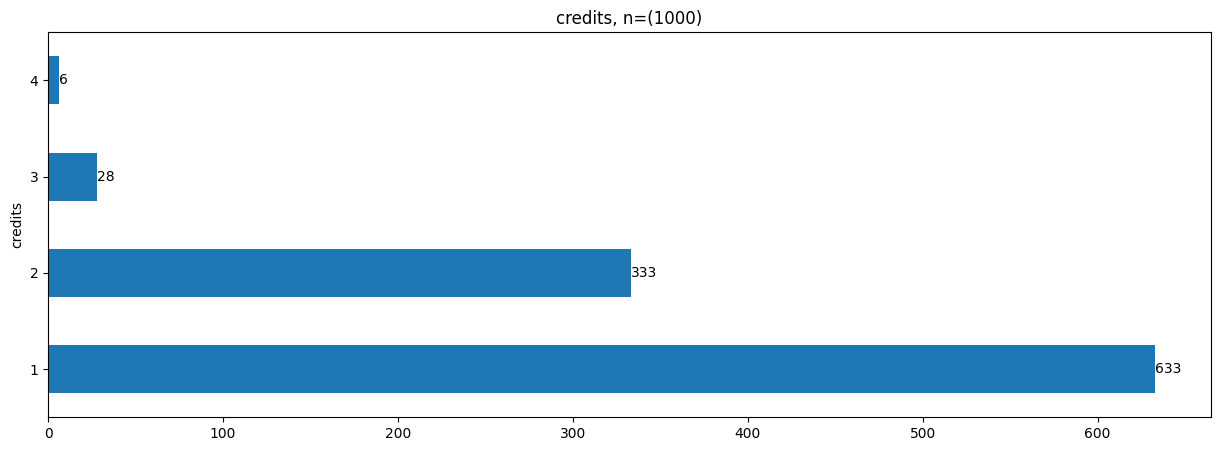

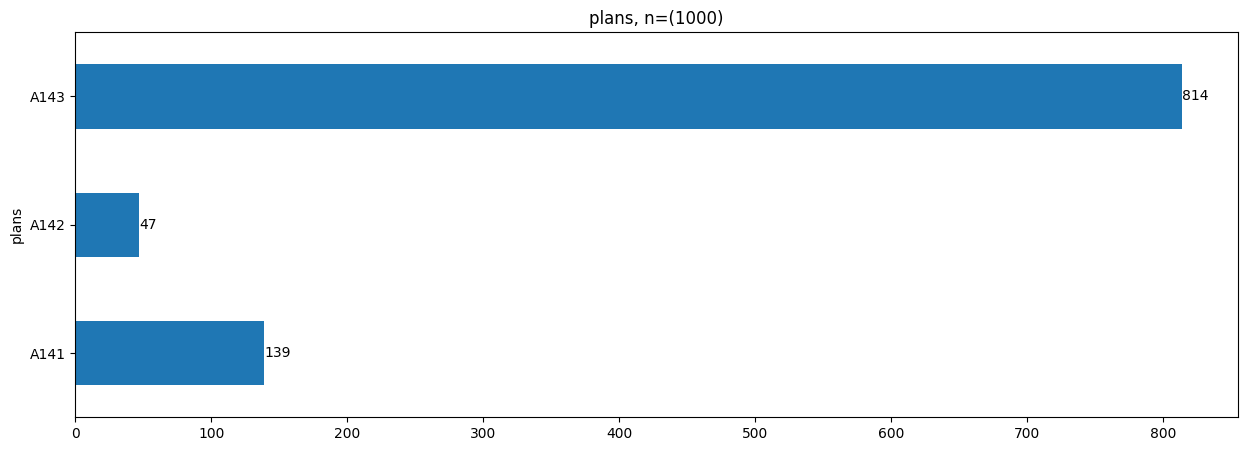

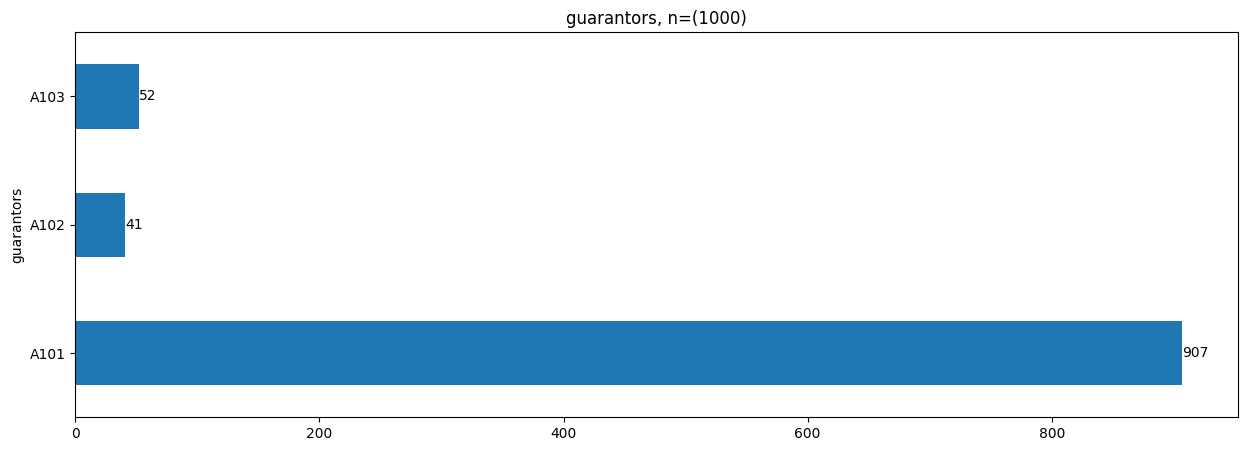

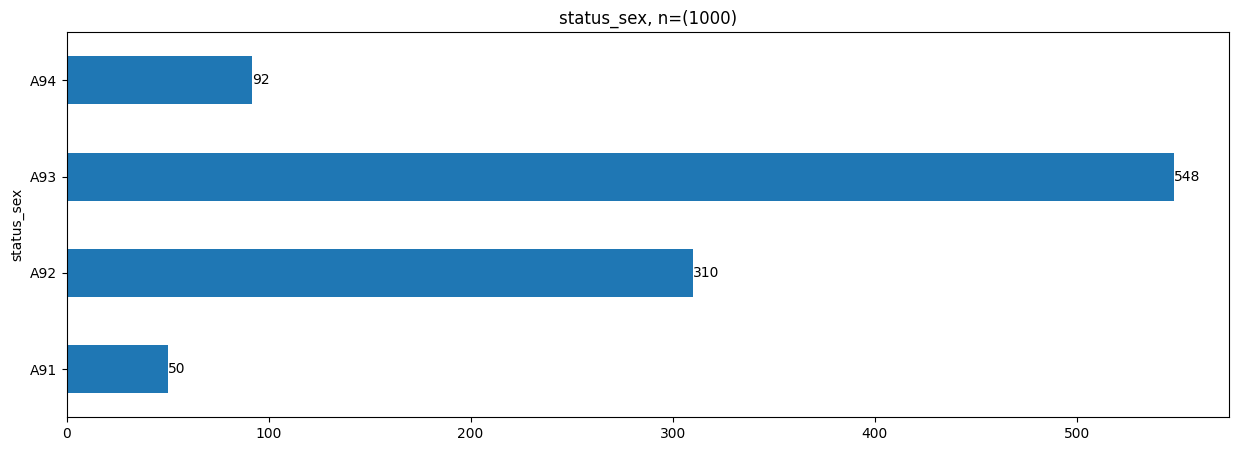

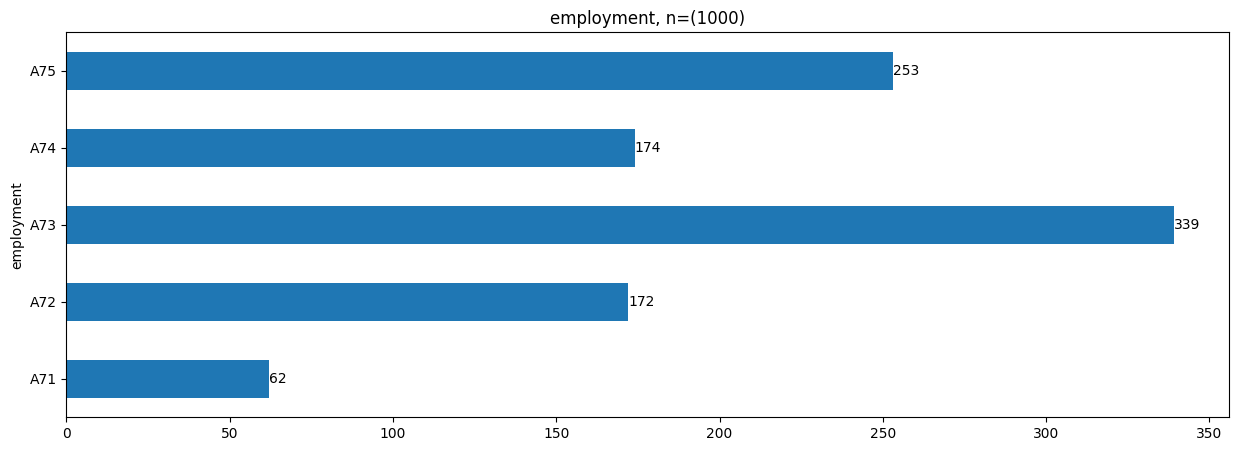

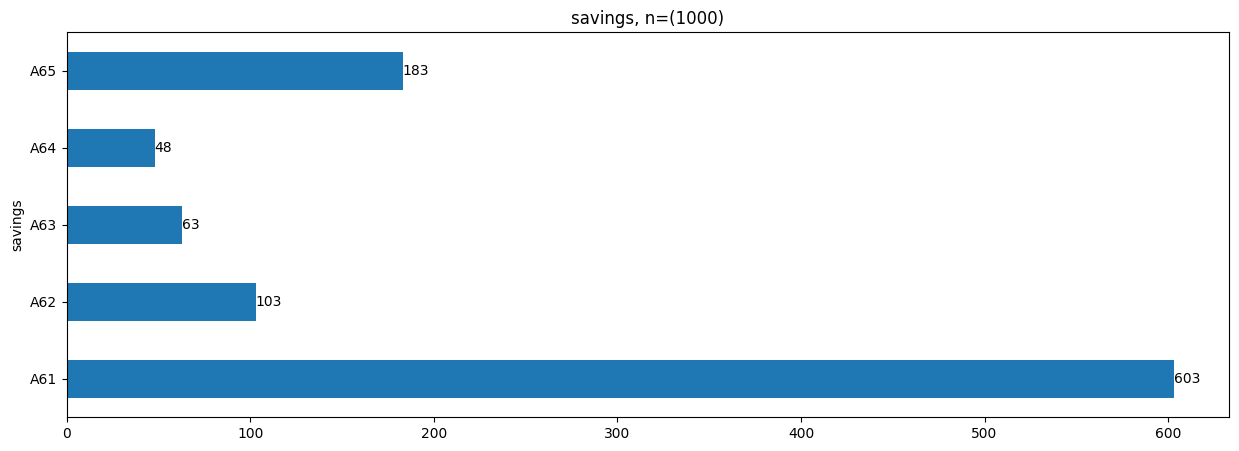

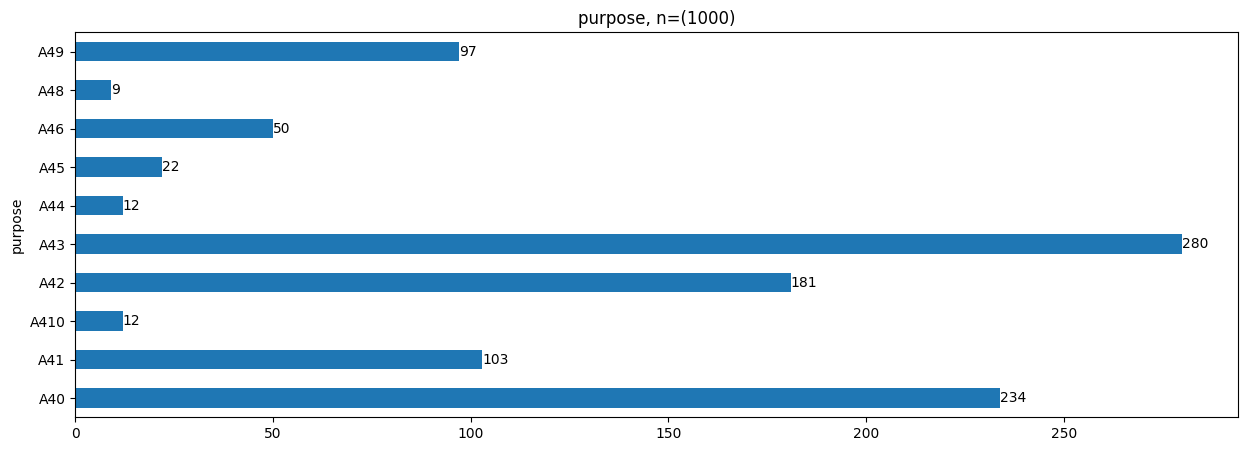

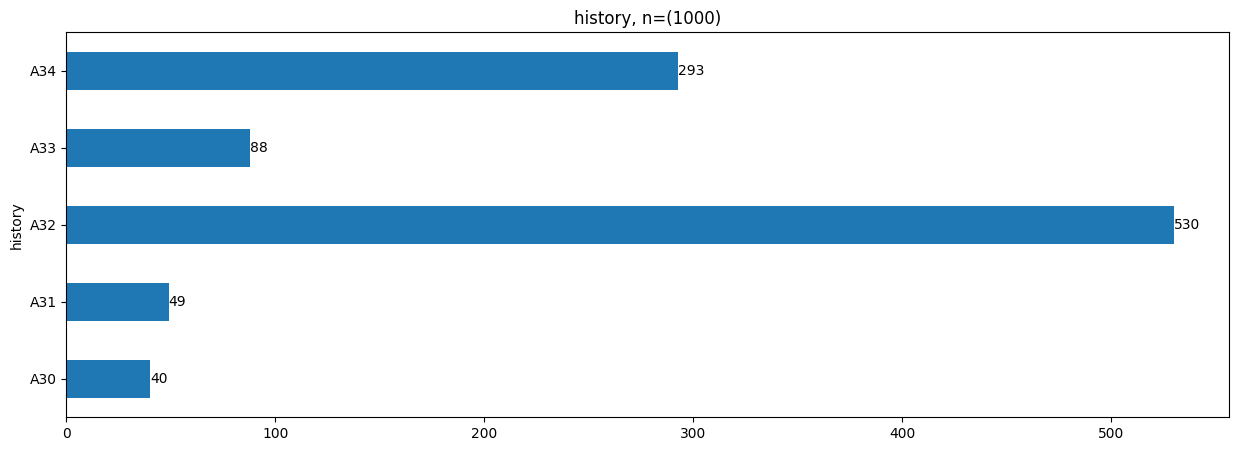

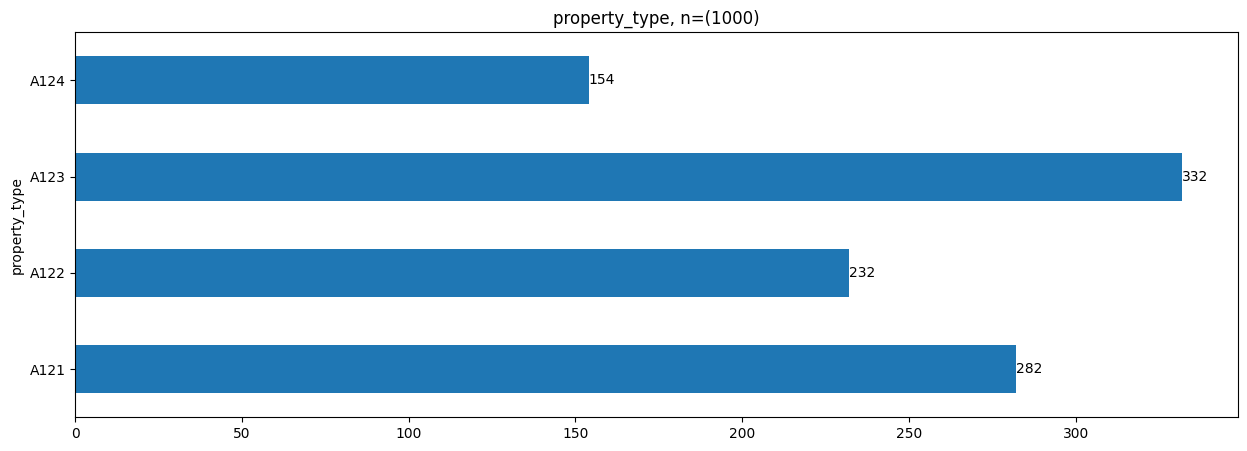

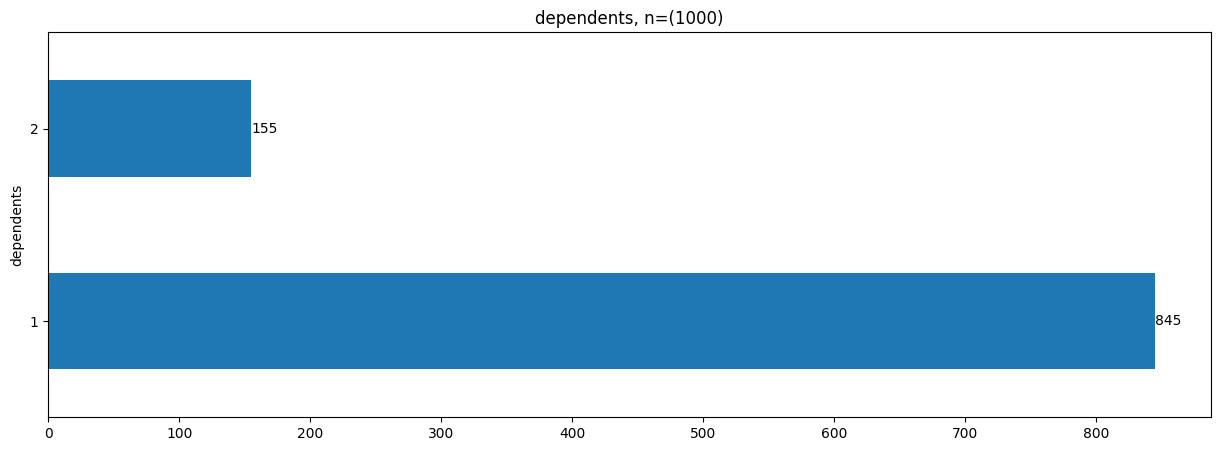

<Figure size 640x480 with 0 Axes>

In [31]:
plot_categoricals(X, qualitative_variables)

#### Analisys from features

The `foreign` features has few datas from category A202 (indicates that are native worker). It could get a bias to the model, let`s remove this feature from analyses

In [32]:
qualitative_variables.remove('foreign')
X.drop(columns=['foreign'], inplace=True)

The `job` feature has few data from category A171 (unemployed/ unskilled  - non-resident). Let`s ignore this feature to the model.

In [33]:
# all A171 from job will be removed

X = X[X['job'] != 'A171']
X['job'].value_counts()

job
A173    630
A172    200
A174    148
Name: count, dtype: int64

`Note`: MODEL does't WORK for workers with the specification:

- unemployed/unskilled and non-resident

The feature `credits` show the number of credits at the bank. However, few clients has 3 or more. 
For simplification, the model will change the credits classification for:

- 1 credit
- 2 or more

In [34]:
# first, let`s convert the numerical variables to categorical, for the feature credits

X['credits'] = X['credits'].astype('category')

# now, everybody with 1 credit will be C1 and everybody with 2, 3 or 4 credits will be C2

X['credits'] = X['credits'].map({1: 'C1', 2: 'C2', 3: 'C2', 4: 'C2'})


In [35]:
X['credits'].value_counts()

credits
C1    620
C2    358
Name: count, dtype: int64

The feature `plans` are avaliating if the credit is by the bank, store or none. However, it`s a binary variable from another point of view:

- there is credit with bank or store
- there is not credit

In [36]:
# for plans, A141 and A142 will be agruped as A14

X['plans'] = X['plans'].map({'A141': 'A14', 'A142': 'A14', 'A143': 'A143'})

In [37]:
X['plans'].value_counts()

plans
A143    795
A14     183
Name: count, dtype: int64

The `guarentors` are another feature that can be seen as binary:

- a101 0
- a102/3 1

In [38]:
# for guarentors, A102 and A103 will be agruped as A123

X['guarantors'] = X['guarantors'].map({'A101': 'A101', 'A102': 'A123', 'A103': 'A123'})

In [39]:
X['guarantors'].value_counts()

guarantors
A101    887
A123     91
Name: count, dtype: int64

For `purpose`, the following categories has few datas:

- A44 : domestic appliances
- A45 : repairs
- A48 : retraining

All this categories will be replaced to others, A410

In [40]:
X['purpose'] = X['purpose'].map({'A40': 'A40', 'A41': 'A41', 'A42': 'A42', 'A43': 'A43', 'A44': 'A410', 'A45': 'A410', 'A46': 'A46', 'A47': 'A47', 'A48': 'A410', 'A49': 'A49', 'A410': 'A410'})

In [41]:
X['purpose'].value_counts()

purpose
A43     278
A40     223
A42     180
A41     102
A49      95
A410     51
A46      49
Name: count, dtype: int64

The `history` feature have two dubios categories, and both of them have few quantities:

- A30 : no credits taken/all credits paid back duly
- A31 : all credits at this bank paid back duly

So, all A30 and A31 will be replaced to A301

In [42]:
X['history'] = X['history'].map({'A30': 'A301', 'A31': 'A301', 'A32': 'A32', 'A33': 'A33', 'A34': 'A34'})

In [43]:
X['history'].value_counts()

history
A32     520
A34     285
A33      88
A301     85
Name: count, dtype: int64

checking the data after change

              count unique   top freq
status          978      4   A14  391
history         978      4   A32  520
purpose         978      7   A43  278
savings         978      5   A61  590
employment      978      5   A73  338
status_sex      978      4   A93  540
guarantors      978      2  A101  887
property_type   978      4  A123  327
plans           978      2  A143  795
housing         978      3  A152  700
job             978      3  A173  630
telephone       978      2  A191  580
installment     978      4     4  470
residence       978      4     4  405
credits         978      2    C1  620
dependents      978      2     1  826


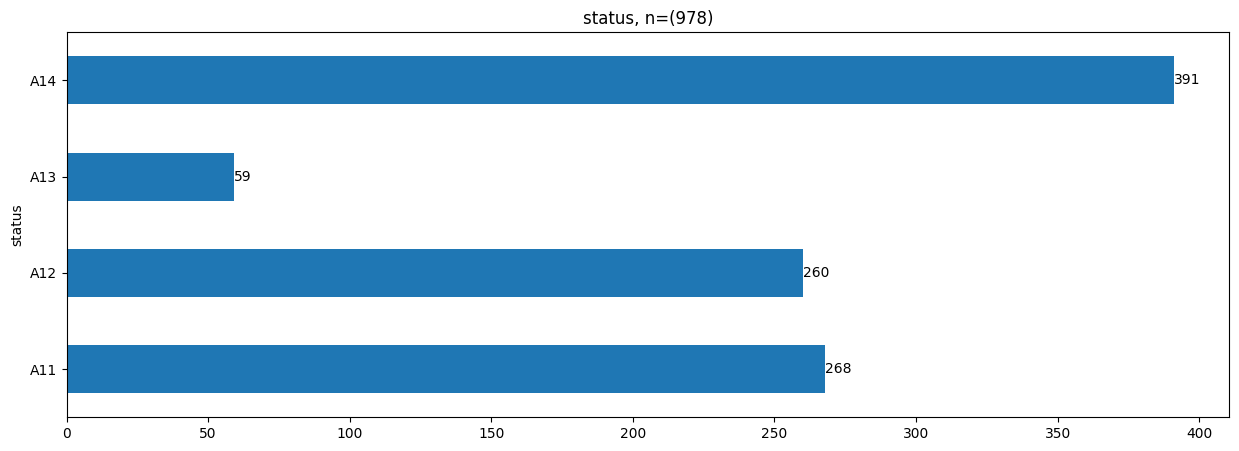

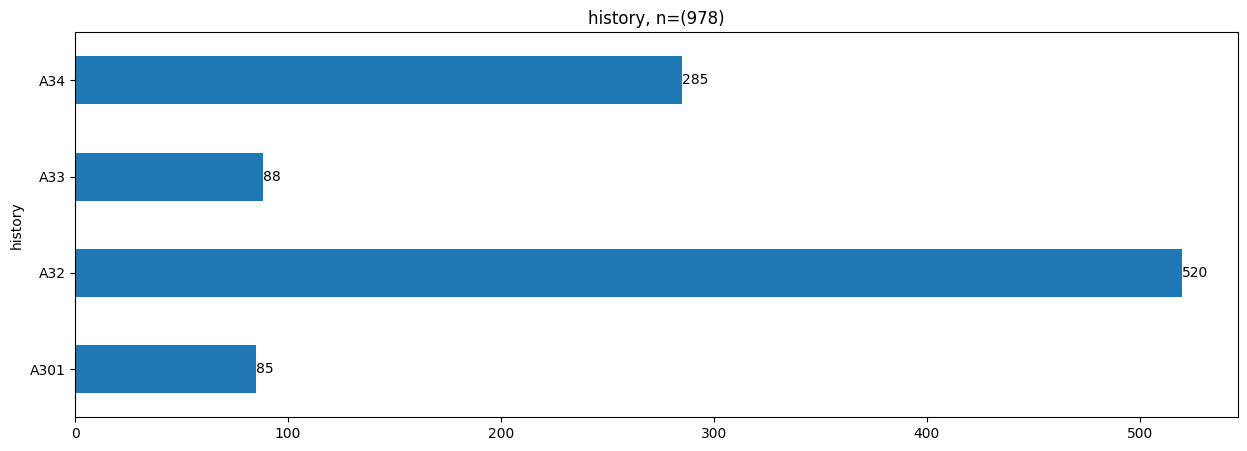

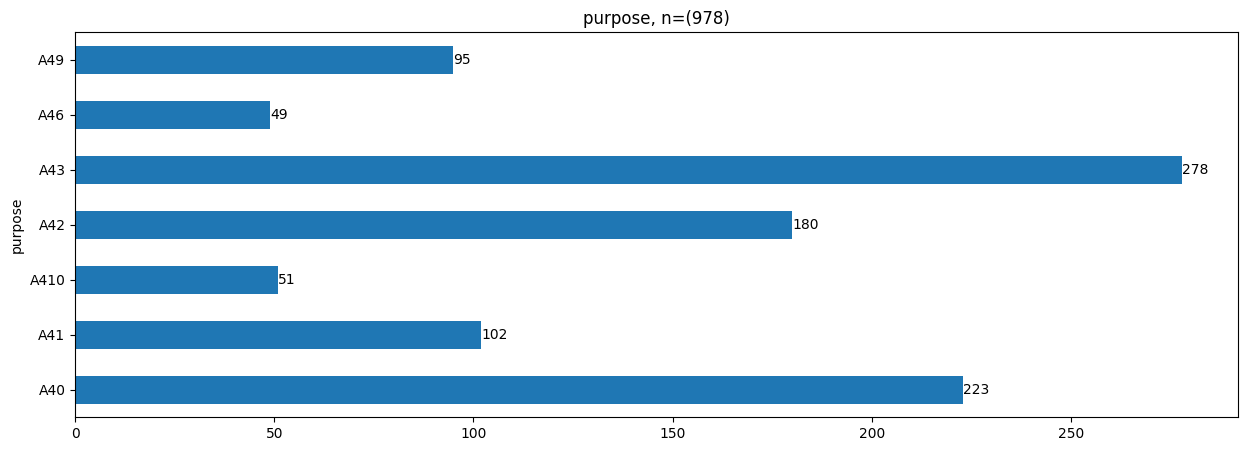

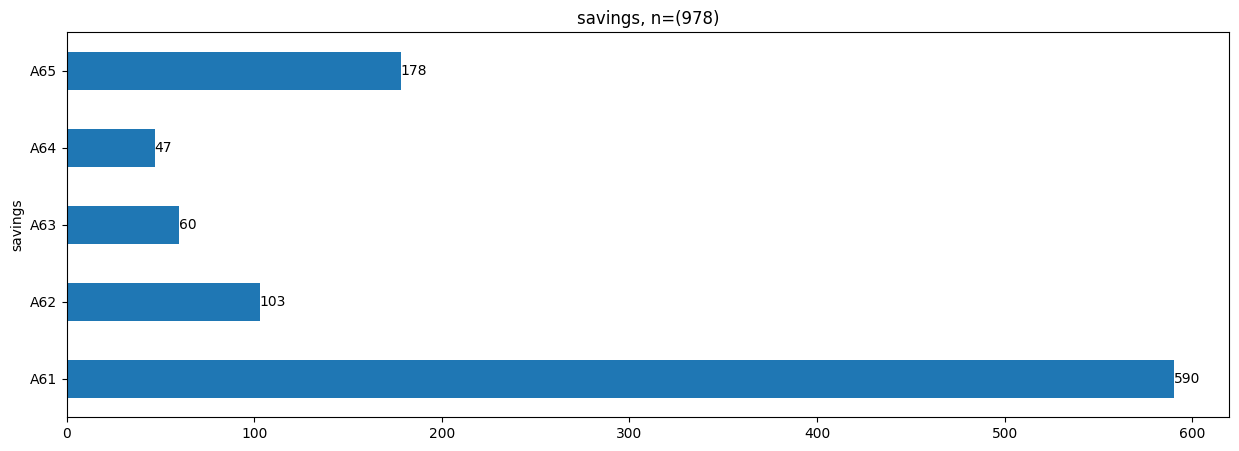

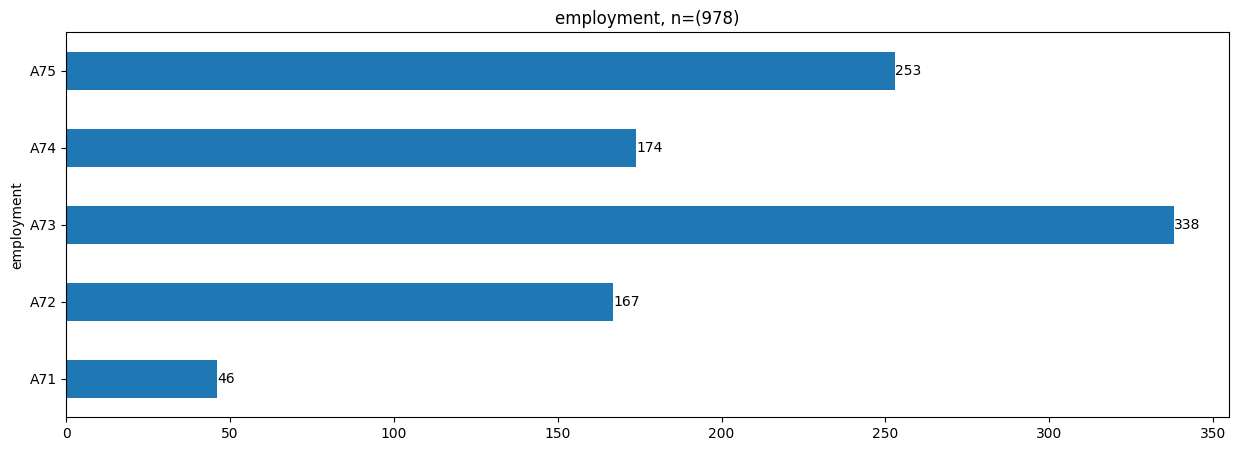

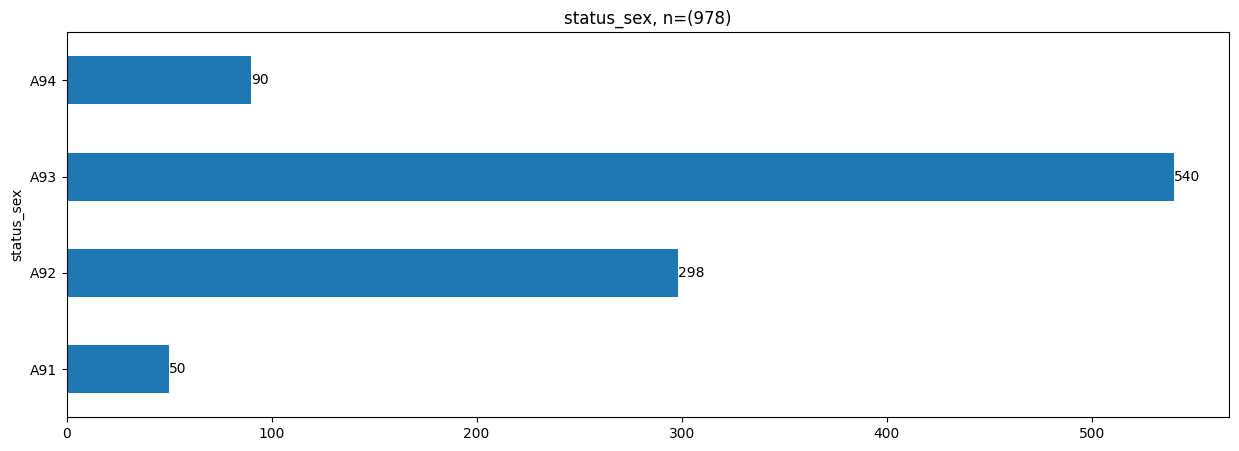

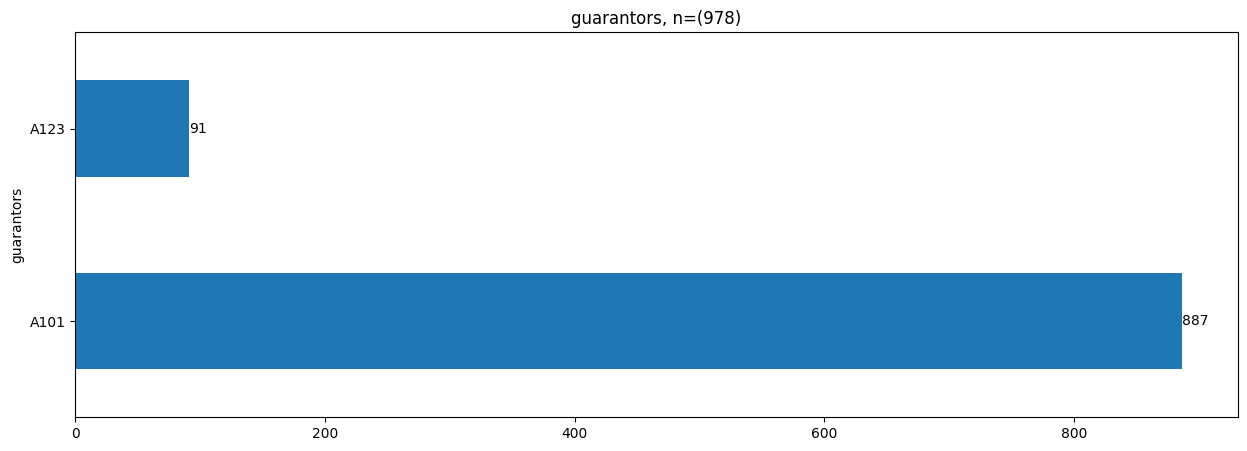

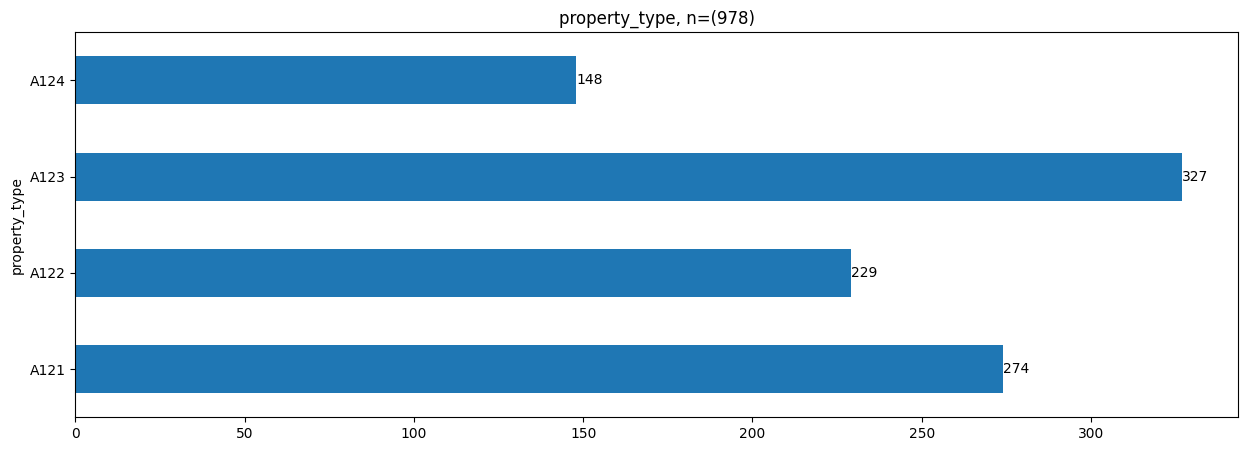

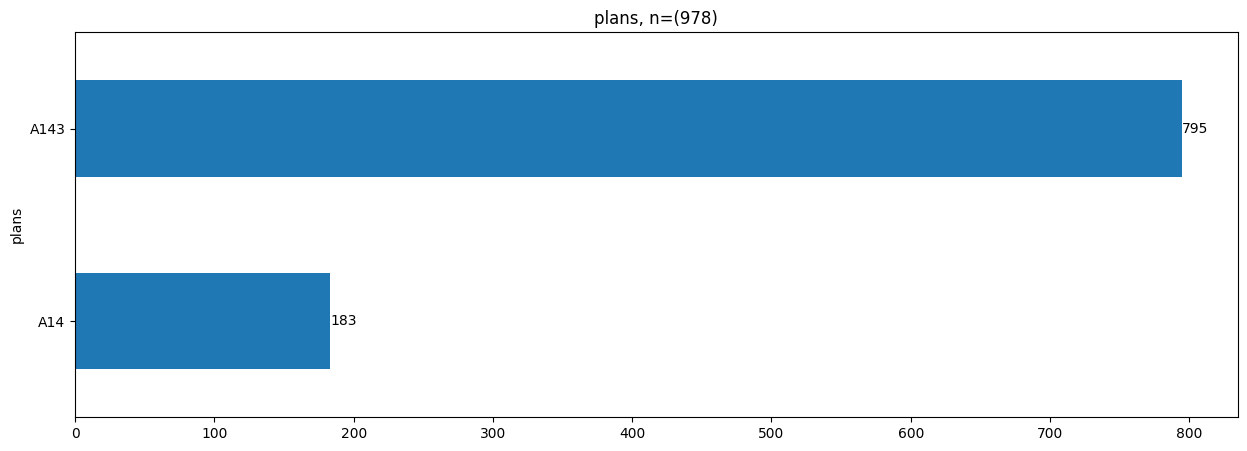

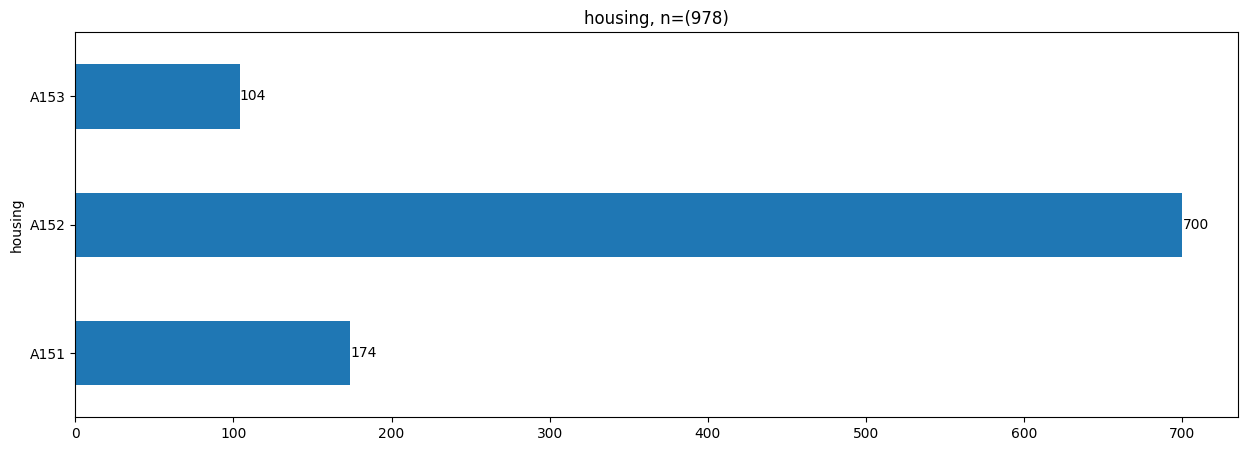

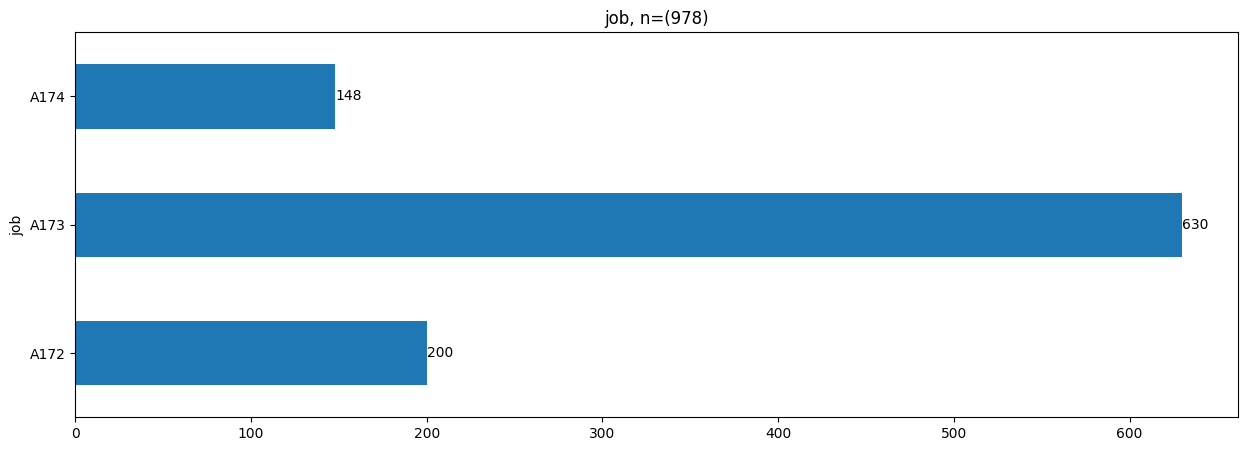

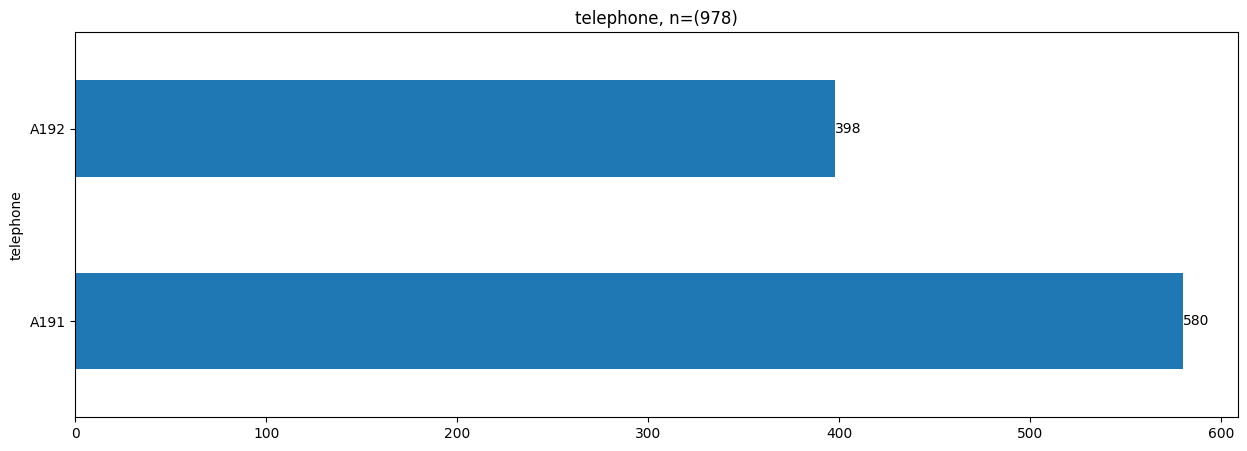

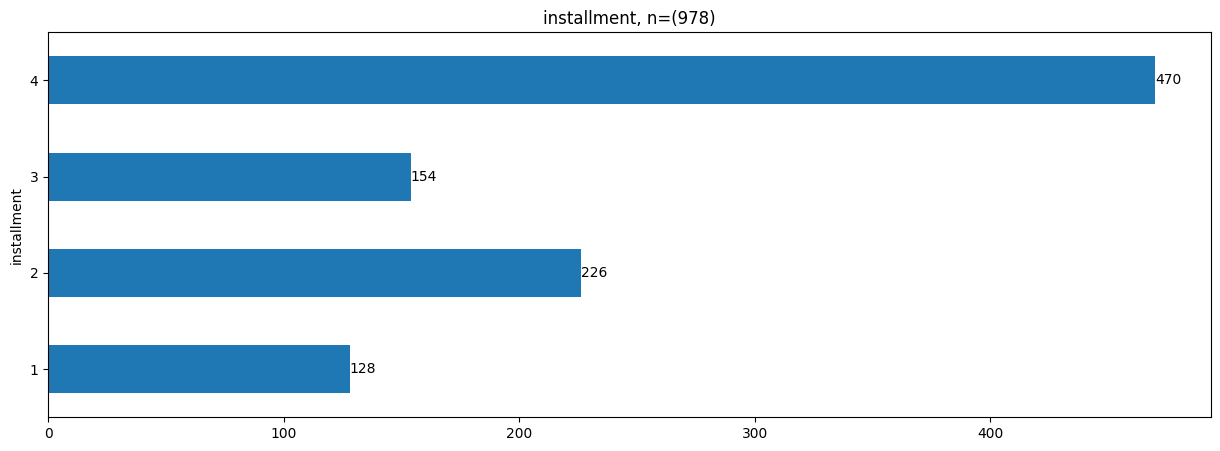

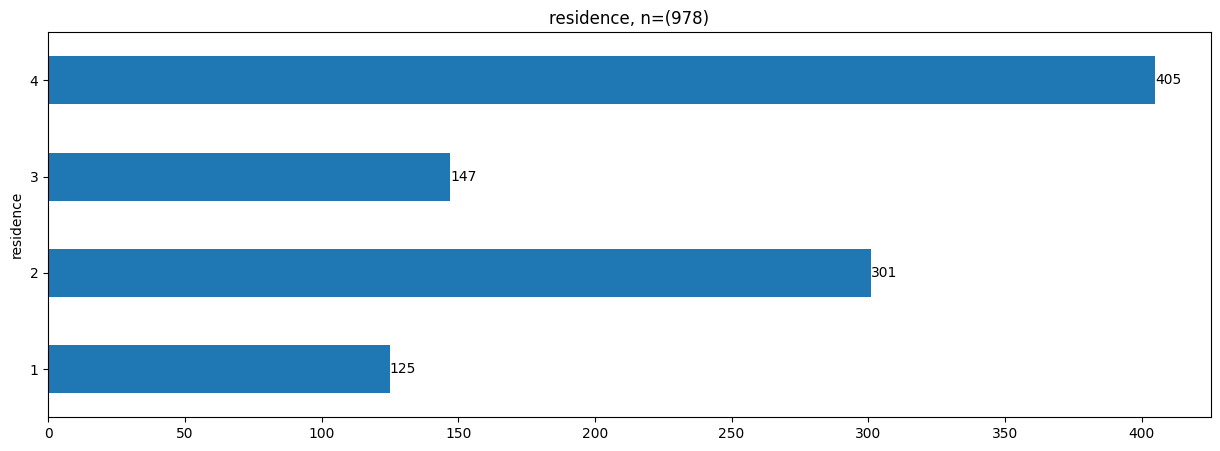

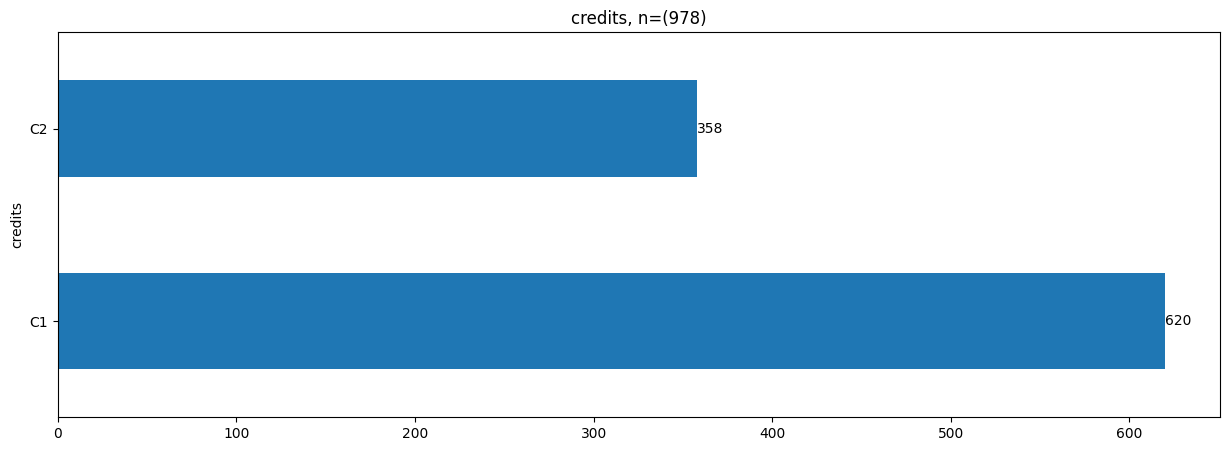

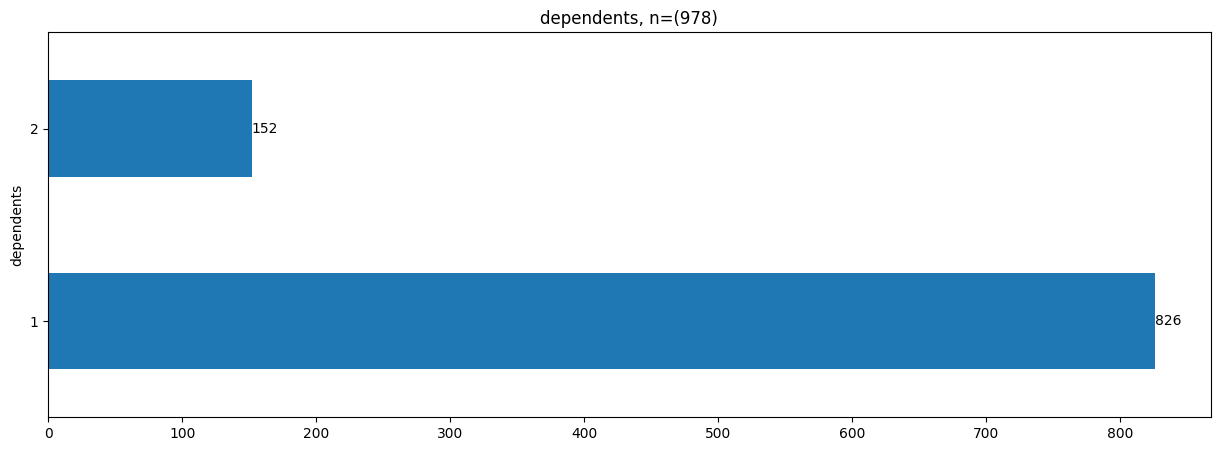

<Figure size 640x480 with 0 Axes>

In [44]:
plot_categoricals(X, qualitative_variables)

Checkibng now the boxplot for the categorical features

/home/arthur/Documentos/Insper/6_semestre/projetos_ml/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arthur/Documentos/Insper/6_semestre/projetos_ml/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arthur/Documentos/Insper/6_semestre/projetos_ml/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arthur/Documentos/Insper/6_semestre/projetos_ml/venv/lib/python3.10/site-packages/seaborn/_

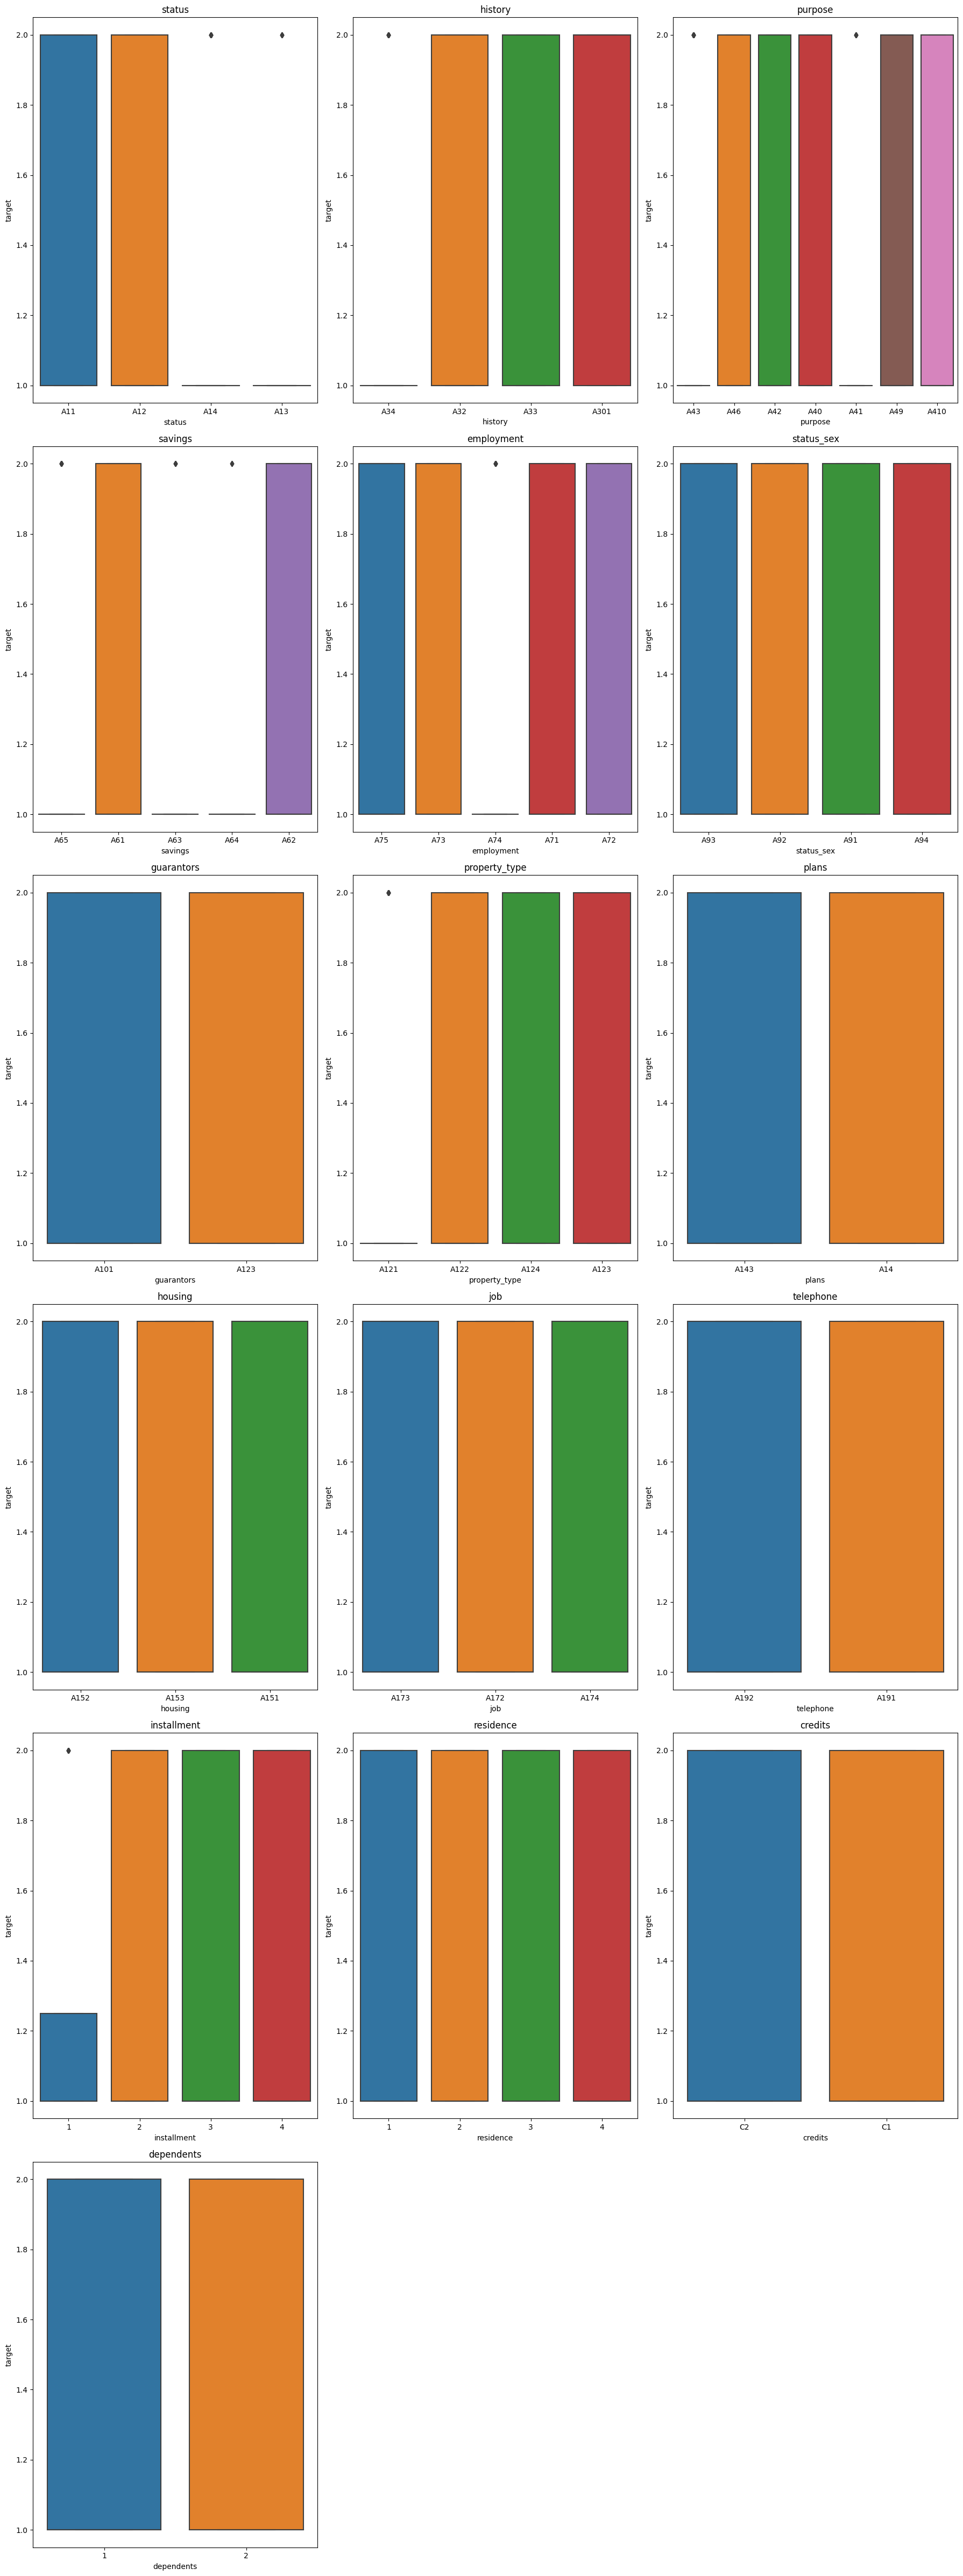

In [45]:
n_rows = (len(qualitative_variables) - 1) // 3 + 1

plt.figure(figsize=(18, n_rows * 8))

for i, variable in enumerate(qualitative_variables):
    df_aux = X
    df_aux['target'] = y
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(x= variable, y='target', data= df_aux)
    plt.title(variable)

plt.tight_layout()

Looks like there is nothing to be deduse from the plot.

#### Feature x Feature

In [46]:
corr = X.corr(numeric_only=True)
corr

,duration,amount,age,amount_log,age_log,target
duration,1.000000,0.637032,-0.037032,0.646284,-0.029080,0.221996
amount,0.637032,1.000000,0.047587,0.901705,0.053494,0.156237
age,-0.037032,0.047587,1.000000,0.024755,0.985642,-0.081288
amount_log,0.646284,0.901705,0.024755,1.000000,0.036346,0.114320
age_log,-0.029080,0.053494,0.985642,0.036346,1.000000,-0.093809
target,0.221996,0.156237,-0.081288,0.114320,-0.093809,1.000000


<Axes: >

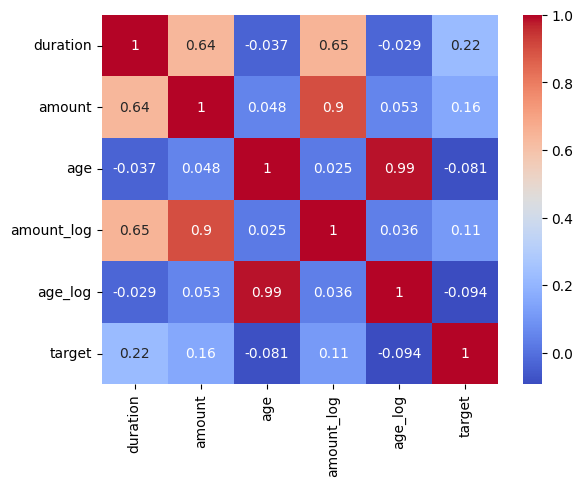

In [47]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True, cmap='coolwarm')

Once there are few numerical variables, the correlationship matrix is short.